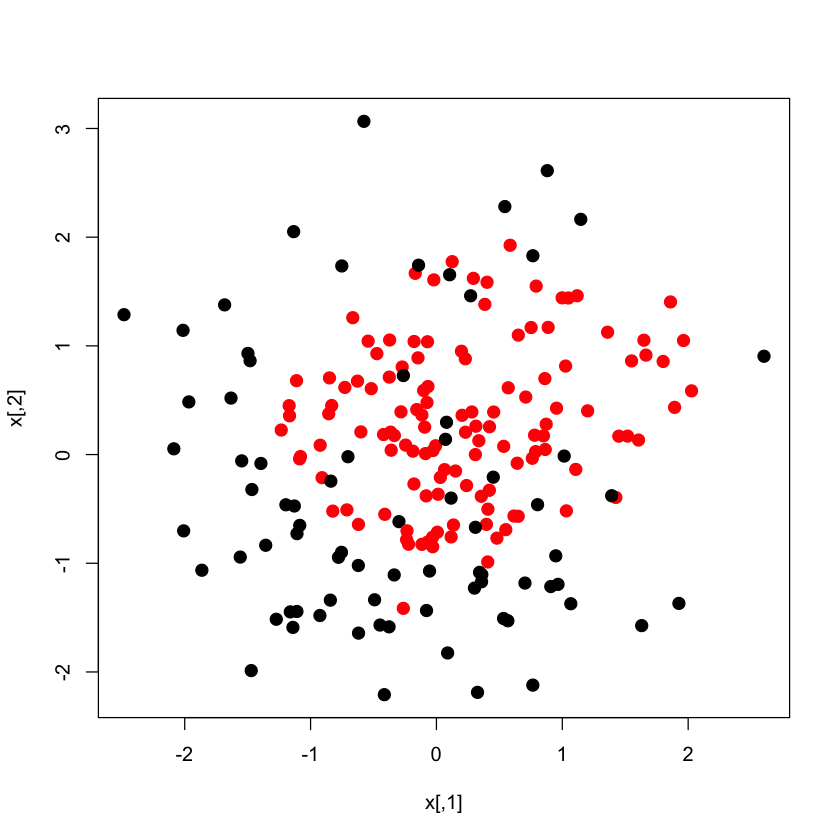

In [1]:
K <- 200
p <- 2
x <- matrix(rnorm(K*p),ncol=p)

ctr1 <- 1
ctr2 <- 0.5
r1 <- 0.2
r2 <- 0.5
v <- r1 * (x[,1]-ctr1)^2 + r2 * (x[,2]-ctr2)^2
t <- 1.2
v0 <- which(v< t)
v1 <- which(v>=t)

gr <- rep(0,K)
p0 <- 0.1
p1 <- 0.9
gr[v0] <- sample(0:1,length(v0),replace=TRUE,prob=c(p0,1-p0))
gr[v1] <- sample(0:1,length(v1),replace=TRUE,prob=c(p1,1-p1))

plot(x,col=gr+1,pch=20,cex=2)

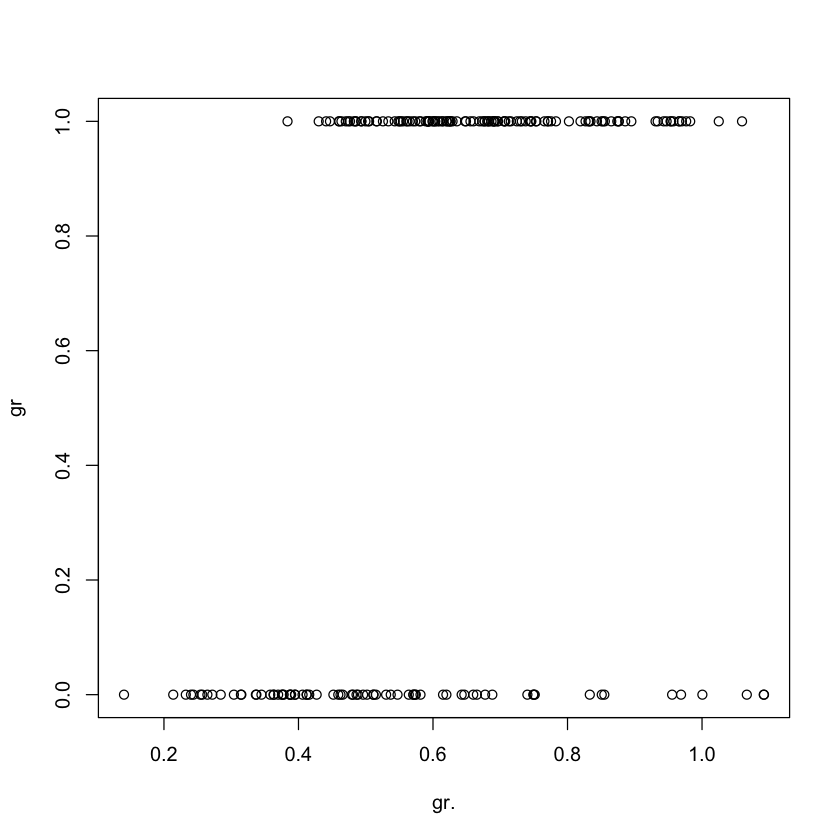

In [2]:
# library(rgl)
# plot3d(cbind(x,gr))
lm.out <- lm(gr~x)
gr. <- predict(lm.out)
plot(gr.,gr)
# plot3d(cbind(x,gr.))

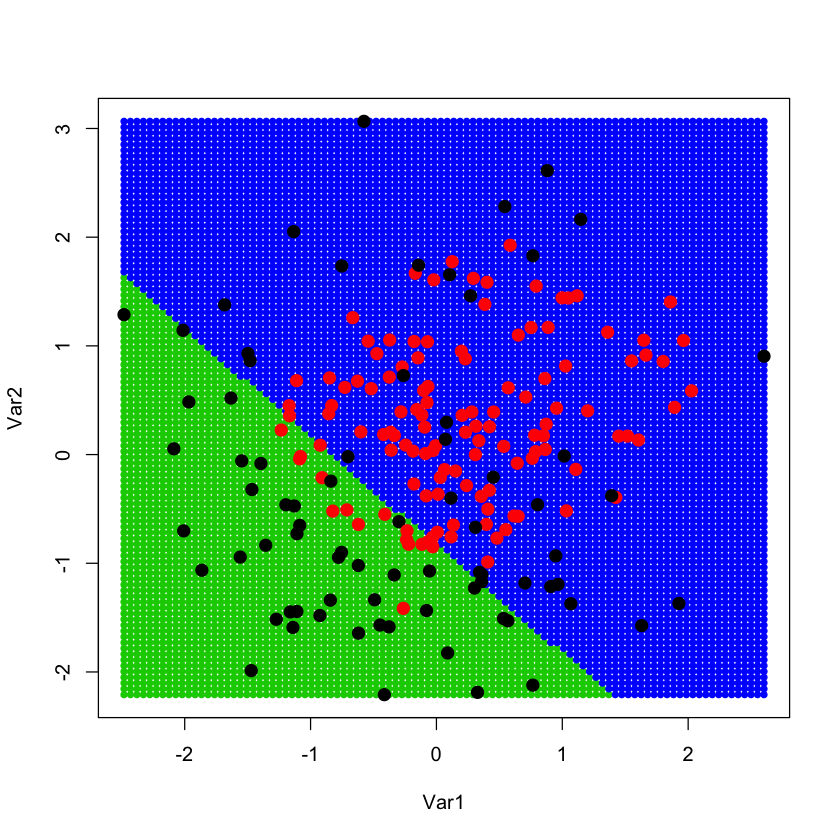

In [3]:
x1. <- seq(from=min(x[,1]),to=max(x[,1]),length=100)
x2. <- seq(from=min(x[,2]),to=max(x[,2]),length=100)
x. <- as.data.frame(expand.grid(x1.,x2.))
y. <- lm.out$coefficients[1] + lm.out$coefficients[2]*x.[,1] + lm.out$coefficients[3]*x.[,2]
col <- (y.>0.5)+3

plot(x.,col=col,pch=20)
points(x,col=gr+1,pch=20,cex=2)


[1] 0.72538524 0.03226017 0.24235459

gr.label
  1   2   3 
345  16 139 

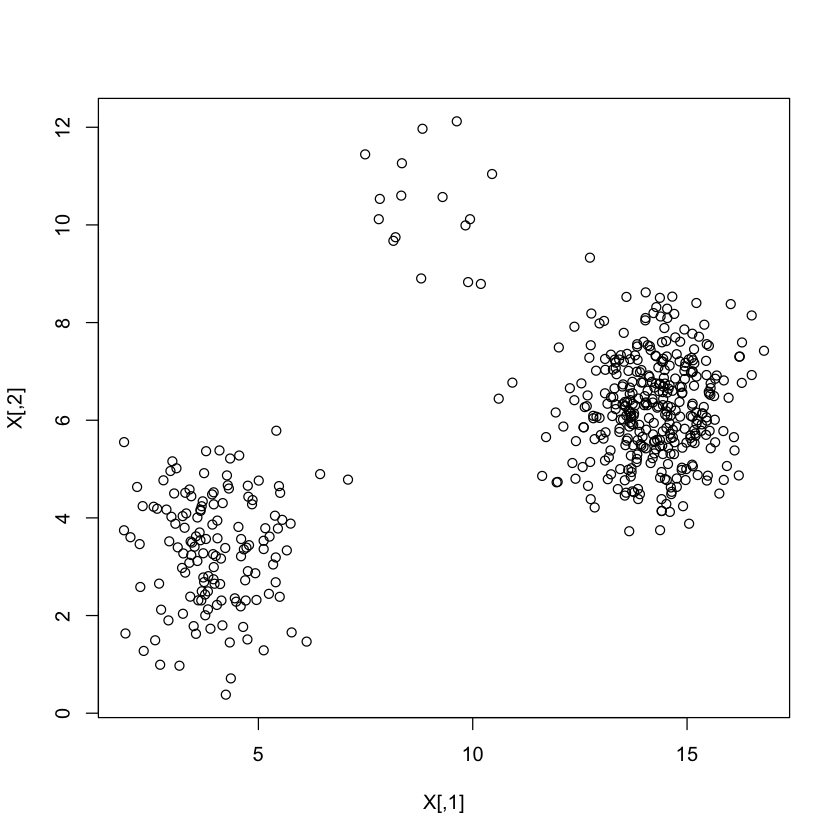

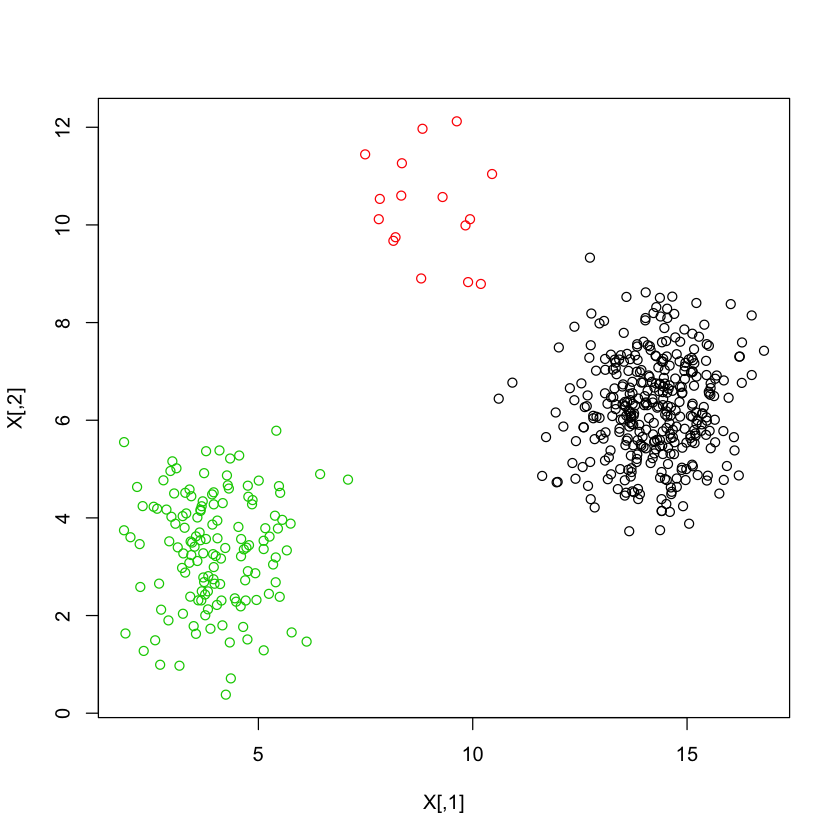

In [4]:
n.gr <- 3 # number of component distributions
d <- 2 # dimension
# Fraction of n.gr distributions
f <- runif(n.gr)
f <- f/sum(f)
f
# means
ms <- matrix(runif(n.gr*d),ncol=d)*15
# var-covar matrices are unit matrix for all components

# Sampling
n.sample <- 500
gr.label <- sample(1:3,n.sample,replace=TRUE,prob=f)
table(gr.label)
# locations of samples
X <- matrix(0,n.sample,d)
for(i in 1:n.sample){
    this.gr <- gr.label[i]
    X[i,] <- c(rnorm(1,ms[this.gr,1]),rnorm(1,ms[this.gr,2]))
}

plot(X)
plot(X,col=gr.label) # color with group label

K-means clustering with 3 clusters of sizes 345, 16, 139

Cluster means:
       [,1]      [,2]
1 14.210245  6.228956
2  8.938112 10.357174
3  3.978426  3.341873

Clustering vector:
  [1] 3 3 1 1 3 1 1 3 1 3 3 3 1 1 1 3 3 1 1 1 1 1 1 1 3 3 1 3 1 3 3 1 1 1 1 1 1
 [38] 1 1 1 3 1 1 3 1 3 1 1 1 1 1 1 3 3 1 3 3 2 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 1
 [75] 1 3 1 1 3 1 1 1 1 1 2 1 1 1 3 1 1 1 1 3 1 3 1 1 3 3 1 3 3 1 1 3 1 1 1 1 3
[112] 3 1 1 3 3 3 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1
[149] 3 1 1 3 3 3 3 3 3 1 3 1 1 1 1 1 3 1 1 1 1 3 1 1 3 1 1 1 3 1 3 1 2 1 3 1 1
[186] 1 1 1 1 3 1 1 2 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 3 3 1 3
[223] 1 1 1 3 1 1 1 1 3 3 3 1 3 3 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 3 1 3 3 1 3 1 1 1 1 1 1 2 1 3 3 1 2 3 2 1 1 1 1 1 1 3 1 3
[297] 3 1 3 3 1 1 3 1 1 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 3 3 1 2 2 1 1 1 3 1 1 1
[334] 1 1 1 3 1 2 1 1 1 3 1 1 3 1 1 1 1 1 1 1 3 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 3 1

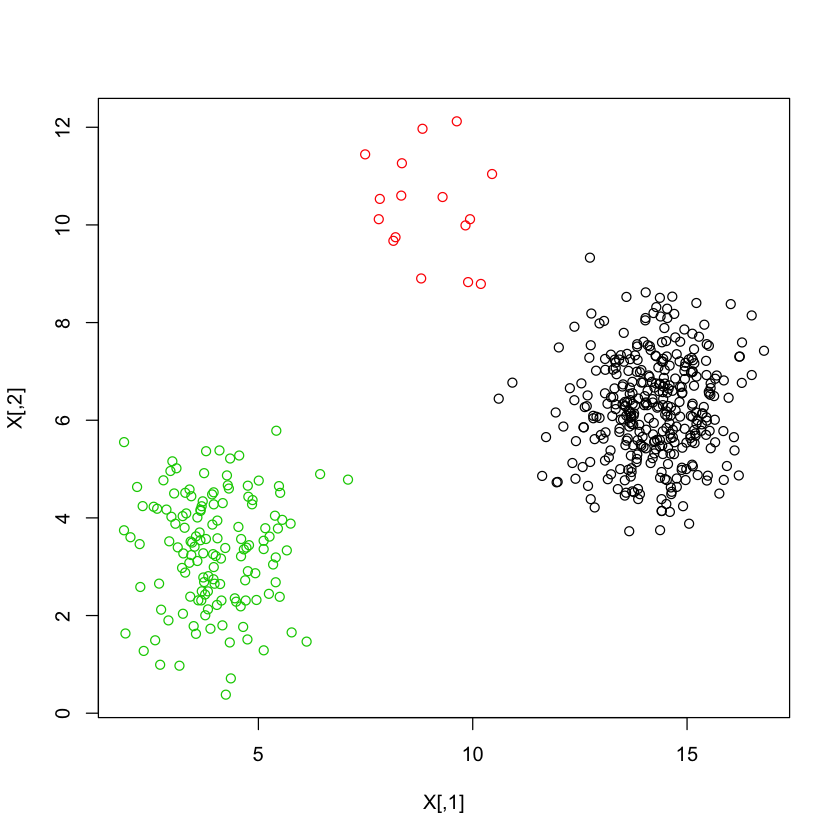

In [5]:
cl <- kmeans(X,n.gr)
plot(X, col = cl$cluster)
cl

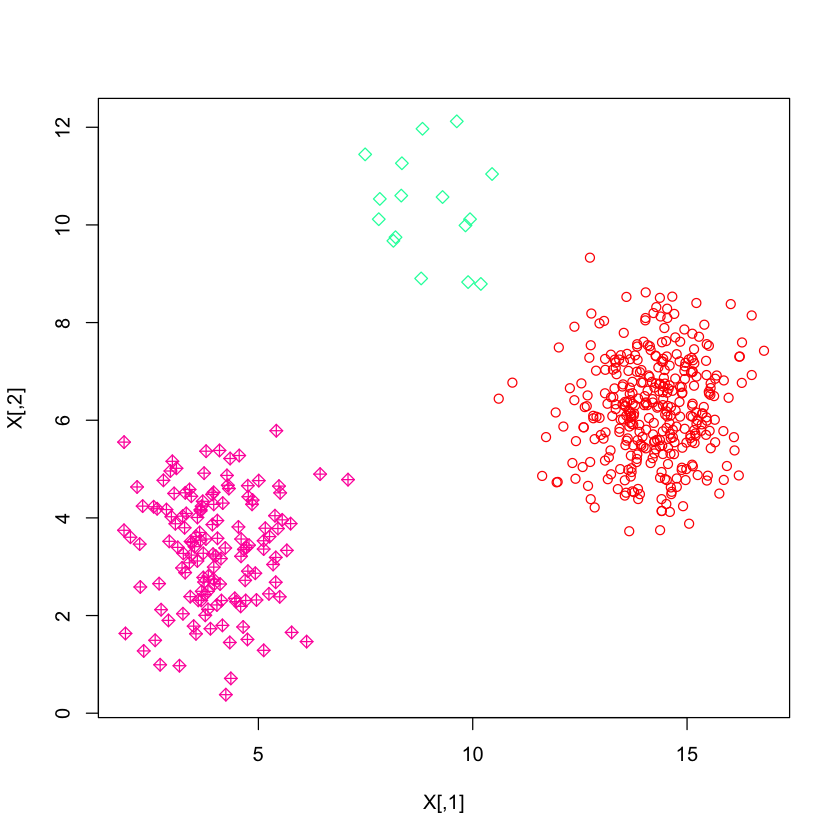

In [6]:
plot(X, col = rainbow(9)[(cl$cluster-1) + 3*(gr.label-1)+1],pch=(cl$cluster-1) + 3*(gr.label-1)+1)